Load dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('telco_churn_cleaned.csv')

# Churn Distribution

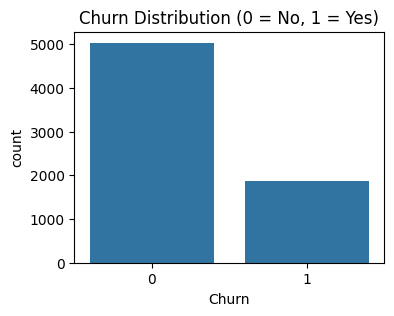

In [7]:
plt.figure(figsize=(4,3))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()


# Churn Rate by Contract Type

In [15]:
if 'Contract_One_year' in df.columns:
    contract_map = {
        (0, 0): 'Month-to-month',
        (1, 0): 'One year',
        (0, 1): 'Two year',
        (1, 1): 'Unknown'
    }
    df['Contract'] = df[['Contract_One_year', 'Contract_Two_year']].apply(lambda x: contract_map.get(tuple(x)), axis=1)
    contract_summary = df.groupby('Contract')['Churn'].mean().reset_index()
    sns.barplot(x='Contract', y='Churn', data=contract_summary)
    plt.title('Churn Rate by Contract Type')
    plt.ylim(0,1)
    plt.show()

# Churn by Senior Citizen

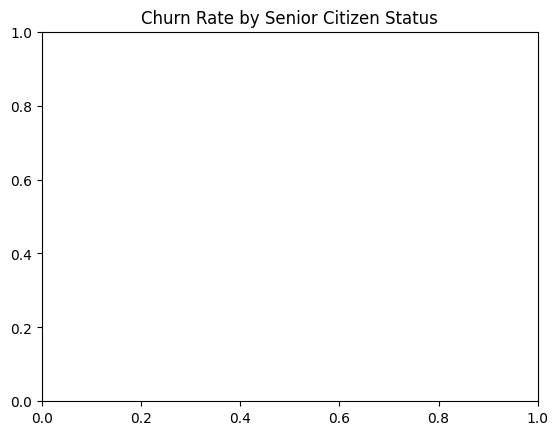

In [16]:
if 'SeniorCitizen_Yes' in df.columns:
    df['Senior'] = df['SeniorCitizen_Yes'].map({0:'No', 1:'Yes'})
    senior_summary = df.groupby('Senior')['Churn'].mean().reset_index()
    sns.barplot(x='Senior', y='Churn', data=senior_summary)
    plt.title('Churn Rate by Senior Citizen Status')
    plt.ylim(0,1)
    plt.show()

# Monthly Charges by Churn

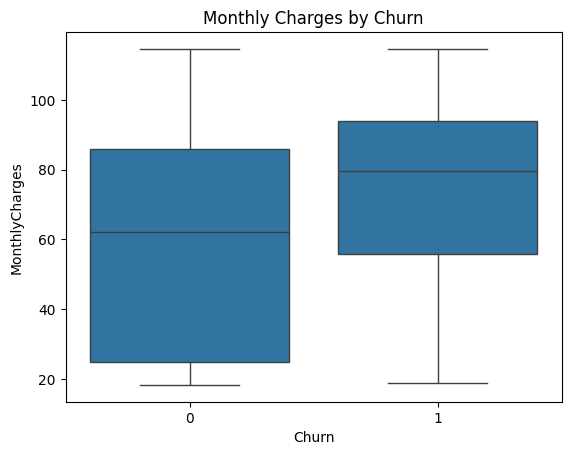

In [17]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Tenure Distribution by Churn

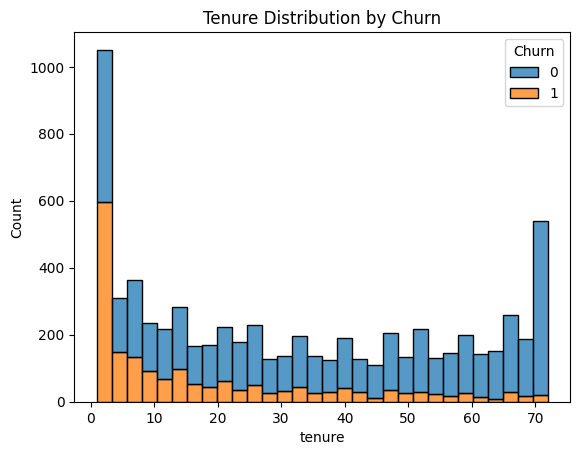

In [18]:
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()

# Feature Correlation (Heatmap)

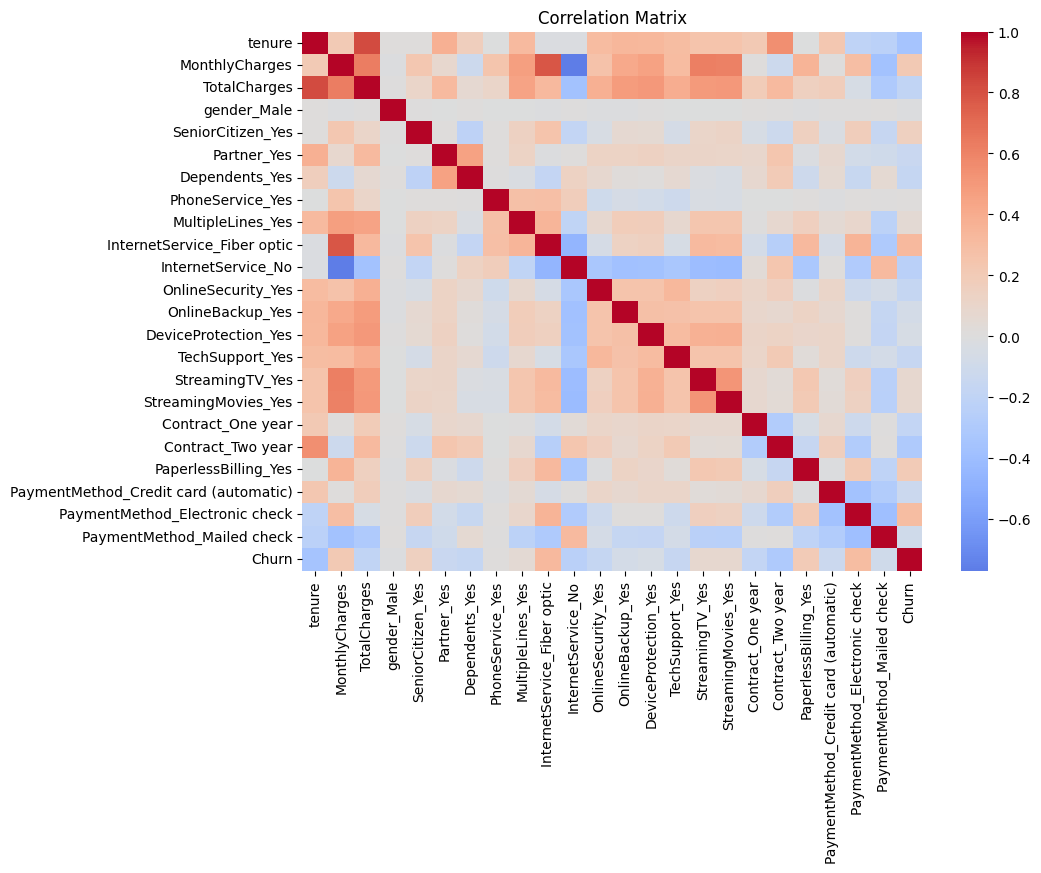

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()